In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from titanic_utils import preprocess

In [2]:
df_train_load = pd.read_csv(r'../train.csv', index_col=0)
df_test_load = pd.read_csv(r'../test.csv', index_col=0)
print(df_train_load.shape)
print(df_test_load.shape)

(891, 11)
(418, 10)


In [3]:
df_train_load.info()
object_columns = df_train_load.select_dtypes(include='object').columns
int_columns = df_train_load.select_dtypes(include='int').columns
float_columns = df_train_load.select_dtypes(include='float').columns
print(f'Columns with dtype as object: {object_columns}')
print(f'Columns with dtype as int: {int_columns}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
Columns with dtype as object: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Columns with dtype as int: Index(['Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


Analyzing column Survived
Non null data: (891,)
Data column description:
0    549
1    342
Name: Survived, dtype: int64


Analyzing column Pclass
Non null data: (891,)
Data column description:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Analyzing column SibSp
Non null data: (891,)
Data column description:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Analyzing column Parch
Non null data: (891,)
Data column description:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64




array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

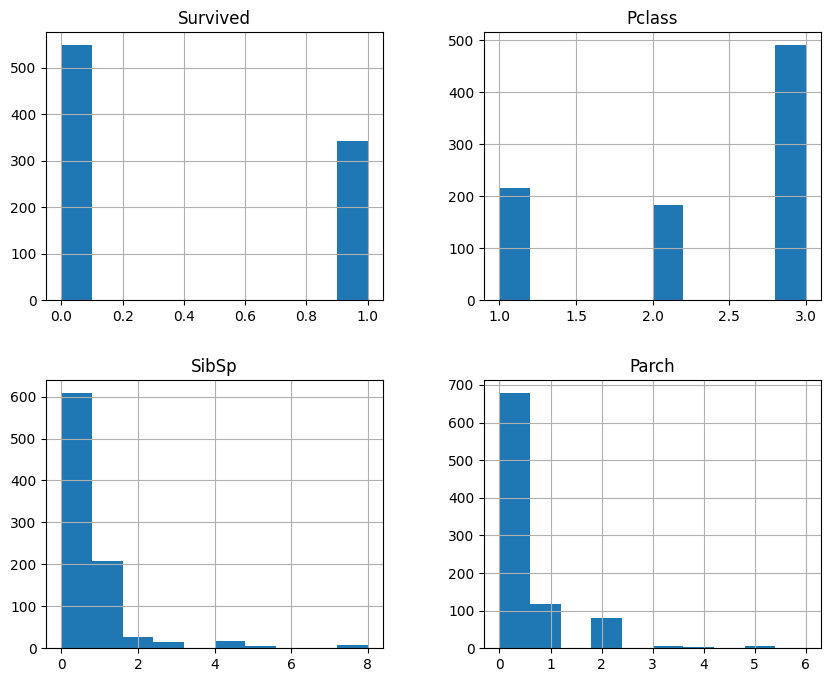

In [4]:
for col in int_columns:
    print(f'Analyzing column {col}')
    print(f'Non null data: {df_train_load[col].dropna().shape}')
    print(f'Data column description:\n{df_train_load[col].value_counts()}\n\n')

df_train_load[int_columns].hist(figsize=(10, 8))

Analyzing column Age
Non null data: (714,)
Data column description:
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


Analyzing column Fare
Non null data: (891,)
Data column description:
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64




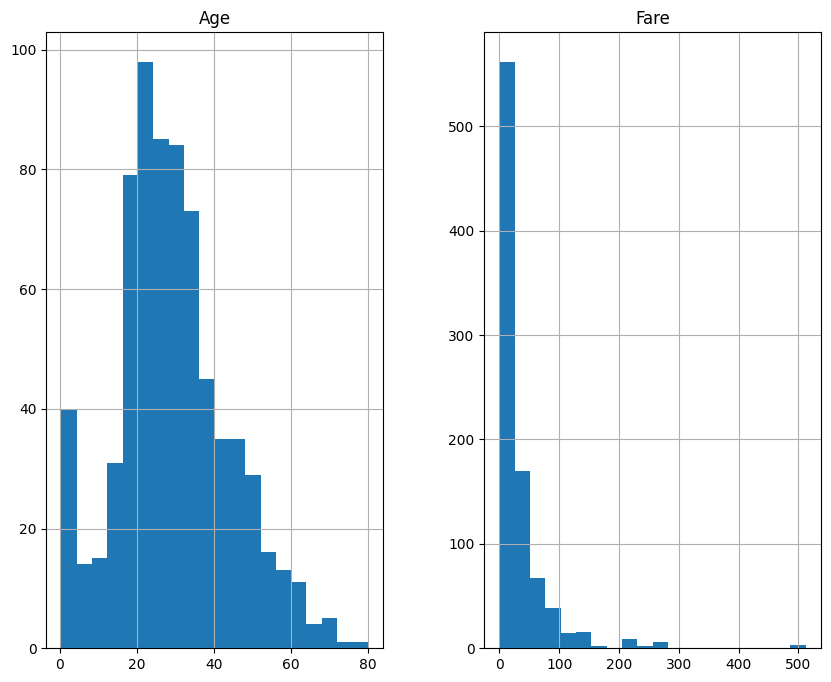

In [5]:
df_train_load[float_columns].hist(bins=20, figsize=(10, 8))

for col in float_columns:
    print(f'Analyzing column {col}')
    print(f'Non null data: {df_train_load[col].dropna().shape}')
    print(f'Data column description:\n{df_train_load[col].value_counts()}\n\n')

In [6]:
for col in object_columns:
    print(f'Analyzing column {col}')
    print(f'Non null data: {df_train_load[col].dropna().shape}')
    print(f'Data column description: {df_train_load[col].value_counts()}\n\n')

Analyzing column Name
Non null data: (891,)
Data column description: Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


Analyzing column Sex
Non null data: (891,)
Data column description: male      577
female    314
Name: Sex, dtype: int64


Analyzing column Ticket
Non null data: (891,)
Data column description: 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int6

Name, Ticket and Cabin, at first glance, are not relevant. Therefore, these columns will be discarded.
Also, Sex and Embarked should be encoded as one-hot encoder.

In [7]:
df_train_load.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_train = preprocess(df_train_load)
df_test = preprocess(df_test_load, train=False)

Input data length: 891
Output data length: 891
Output Columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family Size',
       'Fare/Age', 'SibSp/Parch'],
      dtype='object')
Input data length: 418
Output data length: 418
Output Columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family Size', 'Fare/Age',
       'SibSp/Parch'],
      dtype='object')


In [18]:
x_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family Size', 'Fare/Age', 'SibSp/Parch']
y_columns = ['Survived']

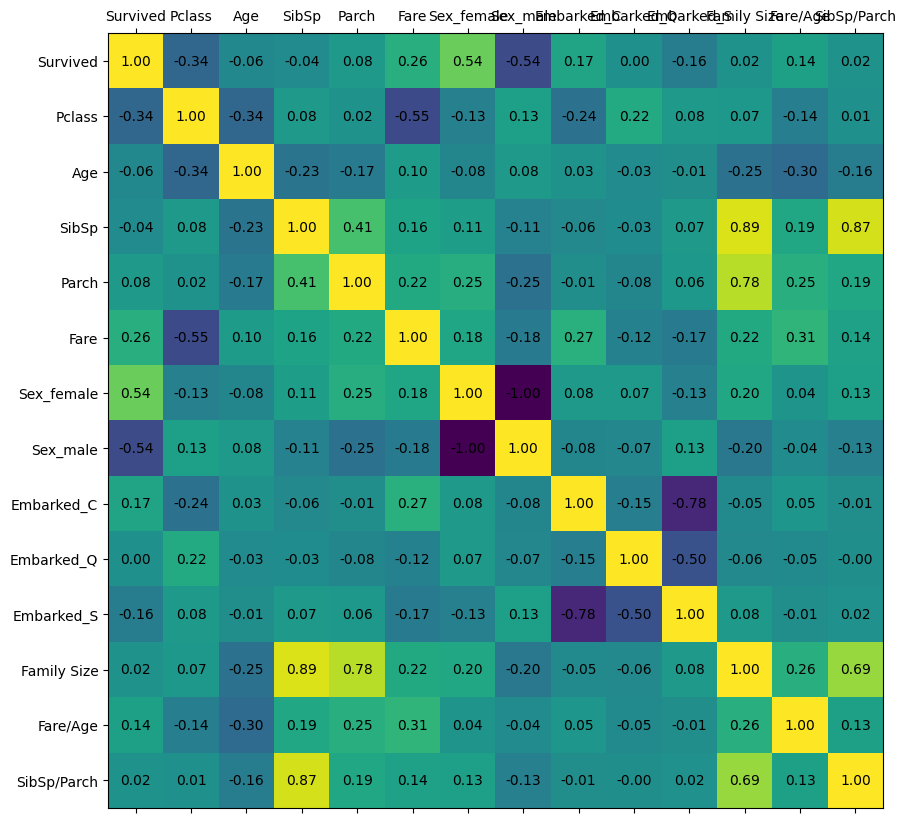

In [19]:
plt.figure(figsize=(10, 10))
plt.matshow(df_train.corr(), fignum=1)
for (x, y), value in np.ndenumerate(df_train.corr()):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.xticks(range(len(df_train.columns)), df_train.columns)
plt.yticks(range(len(df_train.columns)), df_train.columns)
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
x = df_train[x_columns].values
y = df_train[y_columns].values

In [26]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x, y)

DecisionTreeClassifier(max_depth=5)

In [27]:
df_test['Survived'] = clf.predict(df_test[x_columns].values)
df_test['Survived'].to_csv(r'../submission.csv')

In [35]:
import pickle

with open('clf.pkl', 'wb') as file:
    s = pickle.dump(clf, file)